means we apply any matmatical formula to colums and we transform into something else....in this have log  , reciprocal  power , box cox , yeo johnson...

## our data distribtion or probability density function will convert into
## normal function or normal distribution....

## **FUNCTIONAL TRANSFORMER**

**TO KNOW DATA IS NORMAL OR NOT**

1. Seabon displot will teel
2. or call pandas skwed ..pd.skew ...if giving 0 then normal
or negative positive then it is right..
3. qq plot will ...se to net

**LOG TRANSFORM**

FOR MORE INSIGHTS GO TO THE NOTES OF ML COPY.... STATICS PORTION OF
LOG TRANSFORMER BY CAMPUS X ....

**titanics without transform accuracy check::**

In [35]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer



here we are using only 3 coloumn

In [36]:
v = pd.read_csv('/content/train.csv' , usecols = ['Age' ,'Fare', 'Survived'])

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
v.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


 **to check  missing values**

In [39]:
v.isnull().sum()

,0
Survived,0
Age,177
Fare,0


here age have missing value ...we would replace it by mean...

In [40]:
v['Age'].fillna(v['Age'].mean(), inplace=True)

/tmp/ipython-input-40-1215880702.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  v['Age'].fillna(v['Age'].mean(), inplace=True)


In [41]:
v.isnull().sum()

,0
Survived,0
Age,0
Fare,0


by above function fillna... which is function of pandas we have removed missing
value by the mean value...we have checked through null function

In [42]:
v.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [43]:
# extracting x and y coulumn for  training  x any y
x = v.iloc[: , 1:3]
y = v.iloc[: , 0]

**gonna do train test split**

In [44]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

/tmp/ipython-input-45-3267987748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


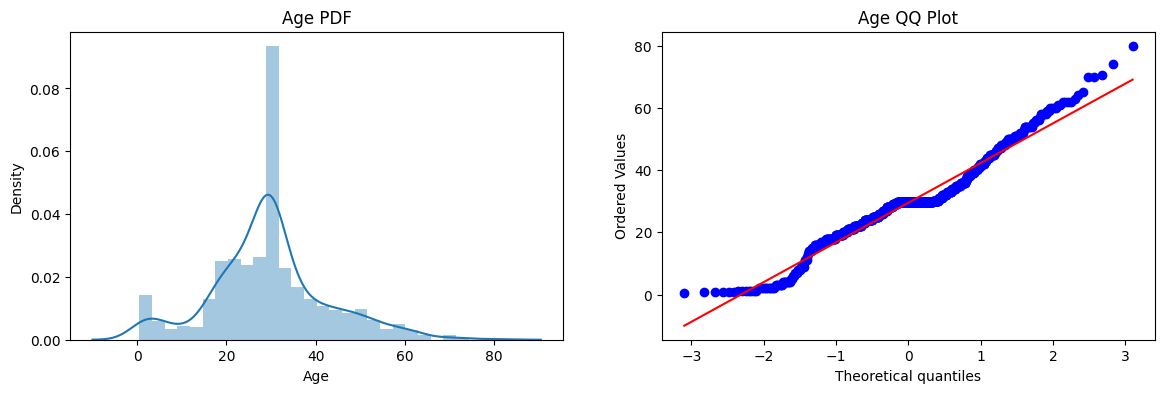

In [45]:
plt.figure(figsize = (14 , 4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'] , dist = 'norm' , plot = plt)
plt.title('Age QQ Plot')

plt.show()

by upper figure! we could say that almost its normally ditsributed....

now lets checkl fare column

/tmp/ipython-input-46-3565829061.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


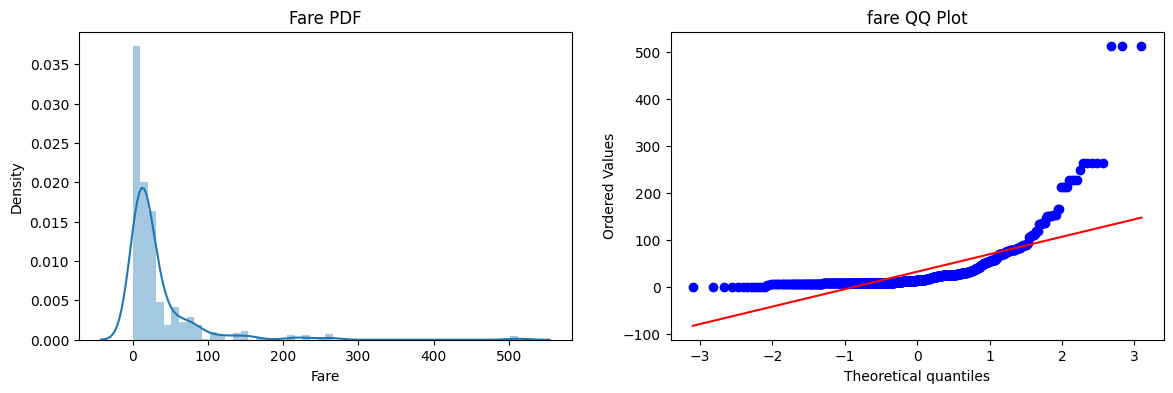

In [46]:
plt.figure(figsize = (14 , 4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'] , dist = 'norm' , plot = plt)
plt.title('fare QQ Plot')

plt.show()

by theoratical quantilees we could say that... this is not normally distributed...
 fare is rightly skewed , so we have to apply log  transformer...

##** by here  i am   goona do model train by using  functional transformer **
     

In [47]:
trf  = FunctionTransformer(func = np.log1p)

In [48]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

In [57]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed , y_train)
clf2.fit(x_train_transformed , y_train)

y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

print("accuracy LR" , accuracy_score(y_test , y_pred)*100)
print("accuracy DT" , accuracy_score(y_test , y_pred1)*100)

accuracy LR 68.15642458100558
accuracy DT 68.15642458100558


## here accuracy of random forset decision is 69  by  applying functional transformer

## also when we do not  aplly functional transformer accuarcy is still almost the same ...does not effected much in decision tree algorithm.... in other notebook  "without functional transformer"  we can see that not much change still the same .... because there is certain algorithm who does not much care that  that how the column data is distributed....


 ## also after apllying the functional  transformer we could see that yes
 ## there is  change in logistic regression .....



we know that by just doing the  train test split
we do not get perfect accuracy...so we call call cross_val_score
function...


## **cross_value_score**

In [56]:
x_transformed = trf.fit_transform(x)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("Logistic Regression" , np.mean(cross_val_score(clf , x_transformed , y , cv = 10 , scoring = 'accuracy'))*100)
print("Decision Tree" , np.mean(cross_val_score(clf2 , x_transformed , y , cv = 10 , scoring = 'accuracy'))*100)


Logistic Regression 67.80274656679151
Decision Tree 66.22097378277154


so we do train test split 10 times and finf out separate  accuracy ..then we do mean of 10 times of accuracy ...but still its is lseer than accuarcy when we did apply functional transformer ....

## **lets plot the figure before  applying the  log transformer and after applying the log transformer**

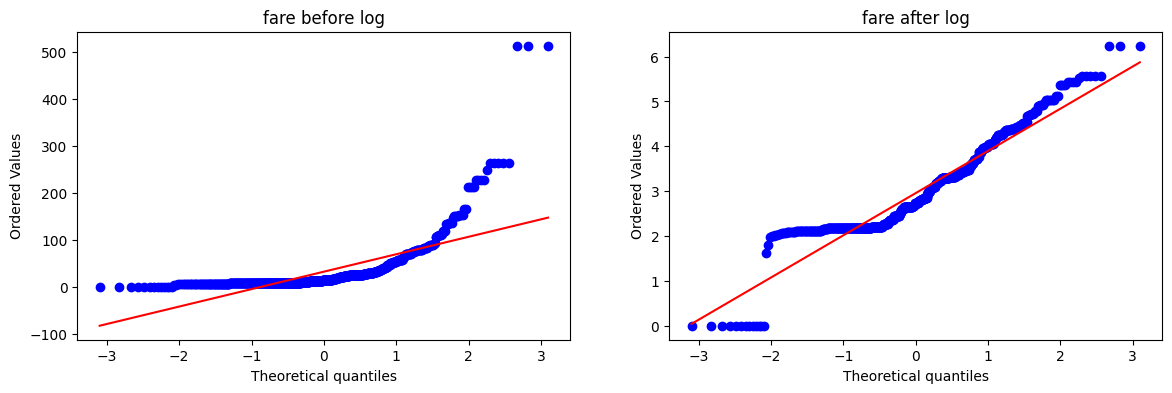

In [55]:
plt.figure(figsize = (14 , 4))

plt.subplot(121)
stats.probplot(x_train['Fare'] , dist = "norm" , plot = plt)
plt.title('fare before log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'] , dist = "norm" , plot = plt)
plt.title('fare after log')


plt.show()

## by above plotting we could see... that yes log function helped a lot to bring the fare data in normal distribution....

## **now lets see of age**

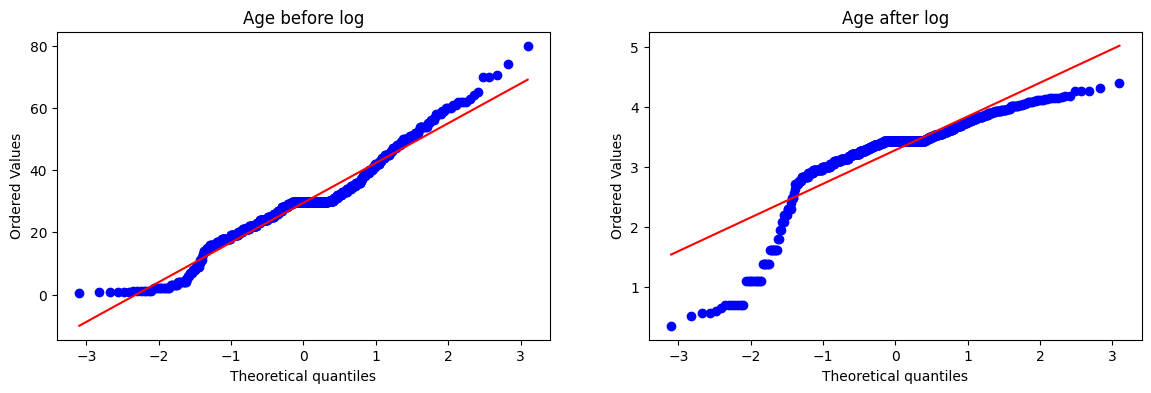

In [58]:
plt.figure(figsize = (14 , 4))

plt.subplot(121)
stats.probplot(x_train['Age'] , dist = "norm" , plot = plt)
plt.title('Age before log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'] , dist = "norm" , plot = plt)
plt.title('Age after log')


plt.show()

by this we could see that applying the log function backfired
because ..before log age was more in normal distribution than applying after ....
lets remove log functional transformer from the age  coloumn ...then accuracy
will be increase in  logistic regression algorithm... since it was also not right skewed ...still we implemented log ... that why may it get worsen ....

**now again we are going to apply the log function but only in the fare coloumn because in age log function get backfired**....

in below syntax we have removed the age from the log only we have included the
fare


In [69]:
trf2 = ColumnTransformer([('log' , FunctionTransformer(np.log1p), ['Fare'])]
                           , remainder = 'passthrough')
x_train_transformed2 = trf2.fit_transform(x_train)
x_test_transformed2 = trf2.transform(x_test)


In [71]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(x_train_transformed2 , y_train)
clf2.fit(x_train_transformed2 , y_train)

Y_Pred = clf.predict(x_test_transformed2)
Y_Pred1 = clf2.predict(x_test_transformed2)

print("accuracy LR" , accuracy_score(y_test , Y_Pred)*100)

accuracy LR 67.0391061452514


**even after removing the log function from the age my accuracy is same but generalluy accuracy increases ....ay therre is somerthing wrong ...
  lets see  later but  this method should be apply for good prediction
   or for geeting high accuarcy .....*